In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf

In [69]:
# Import Data.
# Data is divided into 3 sets. training, cross-validation and test
# Data is dumped into pickle dumps. 
# Data is of the format of a numpy array
# shape of the array is ('n', 3) where 'n' is the number of training/test samples. 
# Each row is a one-dim array of size 3. 
# data[:, 0] is the first feature
# data[:, 1] is the second feature
# data[:, 2] is the output value

# There are three classes in the data. The classes are specified using output values '0', '1' and '2'
# i.e. data[:, 2] belongs to the set {0,1,2}

# The problem is to build a neural network which can take in data and output the predicted class. 

In [70]:
# Import Data
trainData = pickle.load(open("data/trainData.pickle", "rb"))
validationData = pickle.load(open("data/validationData.pickle", "rb"))
testData = pickle.load(open("data/testData.pickle", "rb"))

In [71]:
# Helper method to plot the data. 
# Since there are only two features, it is possible to plot data in a x,y plot
def plotData(d):
    # plot class 0
    temp_data = d[d[:, 2] == 0]
    plt.scatter(temp_data[:,0], temp_data[:,1], marker = "v", s = 2)

    temp_data = d[d[:, 2] == 1]
    plt.scatter(temp_data[:,0], temp_data[:,1], marker = ".", s = 2)

    temp_data = d[d[:, 2] == 2]
    plt.scatter(temp_data[:,0], temp_data[:,1], marker = "x", s = 2)

    plt.show()


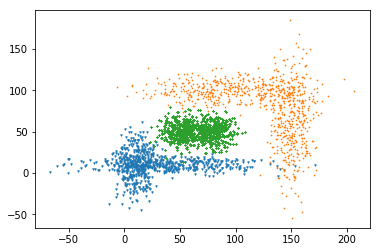

In [72]:
# Plot the training data
plotData(trainData)

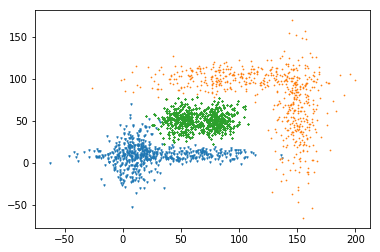

In [73]:
# Each color in the above plot denotes a different class. 
# Similarly the validation data looks like below
plotData(validationData)

In [74]:
# Create helper function to normalize data. Formula used for normalization (x - mean)/(std dev.)


In [75]:
def normalize_data(data, x0_mean, x1_mean, x0_std, x1_std):	
	temp_data = np.zeros((data.shape))
	temp_data[:, 0] = (data[:, 0] - x0_mean) / x0_std
	temp_data[:, 1] = (data[:, 1] - x1_mean) / x1_std

	return(temp_data)

In [76]:
# Helper function to de-normalize data

In [77]:
def denormalize_data(data, x0_mean, x1_mean, x0_std, x1_std):
	temp_data = np.zeros((data.shape))
	temp_data[:, 0] = (data[:, 0] * x0_std) + x0_mean
	temp_data[:, 1] = (data[:, 1] * x1_std)	+ x1_mean
	temp_data[:, 2] = data[:, 2]

	return(temp_data)

In [78]:
# normalize the data. Remove the last column(the output values) and normalize the two features
xData = np.delete(trainData, 2, 1)

train_x0_mean = np.mean(xData[:, 0])
train_x1_mean = np.mean(xData[:, 1])
train_x0_std = np.std(xData[:, 0])
train_x1_std = np.std(xData[:, 1])

nData = normalize_data(xData, train_x0_mean, train_x1_mean, train_x0_std, train_x1_std)

In [79]:
# Helper function to create one-hot encoding
# In a neural network if there are more than 2 classes for classification then one-hot encoding is used
# to create distinct output values for them. 
# In our example since there are three classes the following three one-hot encodings are created 
# [1, 0, 0] ; [0, 1, 0] ; [0, 0, 1]

In [80]:
def one_hot(size, index):
	a = np.zeros(size)
	a[int(index)] = 1
	return a

In [81]:
# One hot encoding of training output
train_output = np.array([one_hot(3, x) for x in trainData[:, 2]])

In [82]:
# Create a neural network for training. The neural network will have only one input layer and one output layer. 

In [83]:
x = tf.placeholder(tf.float32, [None, 2])

W1 = tf.Variable(tf.truncated_normal([2,3], stddev = 0.1))
b1 = tf.Variable(tf.constant(0.1, shape = [3]))
y = tf.matmul(x, W1) + b1

In [84]:
# Define the loss and the optimizer

In [85]:
y_ = tf.placeholder(tf.float32, [None, 3])

In [86]:
cross_entropy = tf.reduce_mean(
	tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

In [87]:
# Use adaptive gradient optimizer for adaptive gradient descent


In [88]:
train_step = tf.train.AdagradOptimizer(1).minimize(cross_entropy)

In [89]:
# Create a session for training

In [90]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [91]:
# create an empty array to store the loss values
loss_arr = np.empty([0])

for _ in range(5000):
    sess.run(train_step, feed_dict={x: nData, y_: train_output})
    # get value of Loss for checking convergence
    cross_entropy_val = sess.run([cross_entropy], feed_dict = {x: nData, y_: train_output})
    loss_arr = np.append(loss_arr, [cross_entropy_val])
    

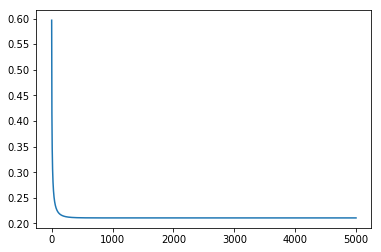

In [92]:
# plot the loss
plt.plot(loss_arr)
plt.show()

In [93]:
# Convergence takes place after around 500 iterations. 

In [94]:
# Measure classification accuracy

In [95]:
# output is classified in class 'c_i' if the maximum value of the output array has index i
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

In [96]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [97]:
# Measure accuracy over validation data

In [98]:
validation_output = np.array([one_hot(3, x) for x in validationData[:, 2]])
vnData = normalize_data(np.delete(validationData, 2, 1),  train_x0_mean, train_x1_mean, train_x0_std, train_x1_std)

In [99]:
print("Accuracy = %s "%sess.run(accuracy, feed_dict={x: vnData,
                                      y_: validation_output}))

Accuracy = 0.926667 


In [100]:
# What does the neural network decision boundary looks like? 
# Create data points covering the ranges that are covered by the training and validation data

In [101]:
#generate uniform random numbers in the same range as the original data
all_points = np.empty([0,2])
for x_i in range(-70, 220):
	for y_i in range (-60, 200):
		all_points = np.append(all_points, [[x_i, y_i]], axis = 0)

In [102]:
# Normalize these points and then run the NN classifier on these points

n_all_points = normalize_data(all_points, train_x0_mean, train_x1_mean, train_x0_std, train_x1_std)

class_pred = tf.argmax(y, 1)
class_pred_val = sess.run([class_pred], feed_dict= {x:n_all_points})

class_arr = np.array(class_pred_val[0])
class_arr = class_arr.reshape([75400, 1])
merged_data = (np.append(n_all_points, class_arr, axis = 1))


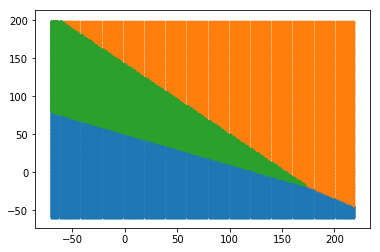

In [103]:
# Denormalize the data and plot it
denorm_merged_data = denormalize_data(merged_data, train_x0_mean, train_x1_mean, train_x0_std, train_x1_std)
plotData(denorm_merged_data)

In [120]:
# Notice the linear decision boundaries. Probably reason for low level of accuracy is that the data is somewhat
# non-linear however decision boundaries are linear. 

In [104]:
# 92% accuracy is good, however lets see if we can improve the accuracy by adding one additional hidden layer
# to the neural network



In [105]:
x = tf.placeholder(tf.float32, [None, 2])

W1 = tf.Variable(tf.truncated_normal([2,3], stddev = 0.1))
b1 = tf.Variable(tf.constant(0.1, shape = [3]))
y1 = tf.matmul(x, W1) + b1

In [106]:
# Apply sigmoid activation to the output of the input layer before they enter the hidden layer

In [107]:
y1_sig = tf.sigmoid(y1)

In [108]:
# Add the hidden layer
W2 = tf.Variable(tf.truncated_normal([3,3], stddev = 0.1))
b2 = tf.Variable(tf.constant(0.1, shape = [3]))

y = tf.matmul(y1_sig, W2) + b2

In [109]:
# Redefine the loss and the optimizer
y_ = tf.placeholder(tf.float32, [None, 3])

cross_entropy = tf.reduce_mean(
	tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))


In [110]:
train_step = tf.train.AdagradOptimizer(1).minimize(cross_entropy)

In [111]:
# start a new session
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [112]:
# create an empty array to store the loss values
loss_arr = np.empty([0])

for _ in range(5000):
    sess.run(train_step, feed_dict={x: nData, y_: train_output})
    # get value of Loss for checking convergence
    cross_entropy_val = sess.run([cross_entropy], feed_dict = {x: nData, y_: train_output})
    loss_arr = np.append(loss_arr, [cross_entropy_val])
    

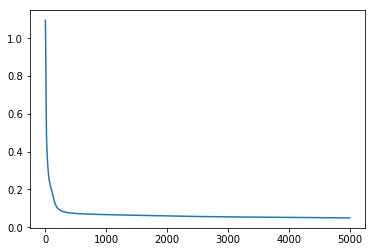

In [113]:
# plot the loss
plt.plot(loss_arr)
plt.show()

In [114]:
# Covergence in this case is relativly slower and takes place after around 1000 iterations

In [115]:
# Measure classification accuracy

In [116]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [117]:
validation_output = np.array([one_hot(3, x) for x in validationData[:, 2]])
vnData = normalize_data(np.delete(validationData, 2, 1),  train_x0_mean, train_x1_mean, train_x0_std, train_x1_std)


In [118]:
print("Accuracy = %s "%sess.run(accuracy, feed_dict={x: vnData,
                                      y_: validation_output}))

Accuracy = 0.986111 


In [119]:
# Significant improvement in accuracy by addition of one hidden layer

In [121]:
# Plot the decision boundaries

In [122]:
class_pred = tf.argmax(y, 1)
class_pred_val = sess.run([class_pred], feed_dict= {x:n_all_points})

class_arr = np.array(class_pred_val[0])
class_arr = class_arr.reshape([75400, 1])
merged_data = (np.append(n_all_points, class_arr, axis = 1))



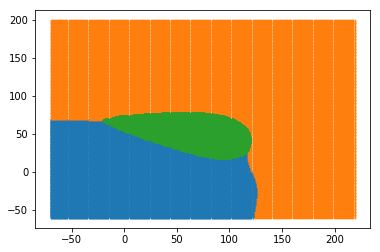

In [123]:
# Denormalize the data and plot it
denorm_merged_data = denormalize_data(merged_data, train_x0_mean, train_x1_mean, train_x0_std, train_x1_std)
plotData(denorm_merged_data)

In [124]:
# Notice that by using a hidden layer the decision boundaries have turned non-linear. Non-linear decision 
# boundaries allow for better fitting of data and is therefore able to improve the overall accuracy